In [1]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
center = []
center.append([2, 2])
center.append([1.8, 1])
x_data = []
y_target = []
for i in range(1000):
    class_choice = round(np.random.rand())
    x_data.append(list(.3*np.random.randn(2) + center[class_choice]))
    y_target.append(class_choice)
x_data = torch.Tensor(x_data)
y_target = torch.Tensor(y_target)

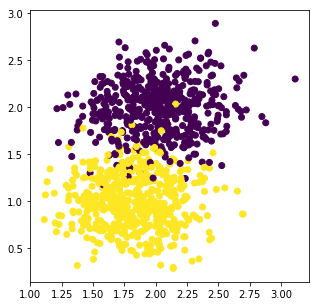

In [3]:
plt.figure(figsize=[5,5])
plt.scatter(x_data[:,0].numpy(), x_data[:,1].numpy(), c=y_target.numpy())

In [4]:
x_data[:10], y_target[:10]

(tensor([[ 1.6298,  1.8834],
         [ 2.0712,  2.2168],
         [ 1.5077,  1.9944],
         [ 2.4409,  2.3340],
         [ 1.9578,  1.2472],
         [ 2.2658,  1.8791],
         [ 1.9455,  2.0852],
         [ 2.3296,  1.6103],
         [ 2.3568,  2.5233],
         [ 2.3469,  2.1150]]),
 tensor([ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]))

In [5]:
n_tot = x_data.shape[0]
split = round(.7 * n_tot)
split

700

In [6]:
x_train = x_data[:split]
x_test = x_data[split:]
y_train = y_target[:split]
y_test = y_target[split:]
x_train.shape, x_test.shape

(torch.Size([700, 2]), torch.Size([300, 2]))

In [7]:
class Perceptron(nn.Module):
    def __init__(self, input_dim):
        super(Perceptron, self).__init__()
        self.fc = nn.Linear(input_dim, 1)
        self.sig = nn.Sigmoid()
        
    def forward(self, x):
        return self.sig(self.fc(x).squeeze())

In [8]:
model = Perceptron(2)

In [9]:
model

Perceptron(
  (fc): Linear(in_features=2, out_features=1, bias=True)
  (sig): Sigmoid()
)

In [12]:
model.fc(x_train)[:10]

tensor([[ 1.0921],
        [ 1.2034],
        [ 1.1008],
        [ 1.2652],
        [ 1.0034],
        [ 1.1584],
        [ 1.1646],
        [ 1.1130],
        [ 1.2930],
        [ 1.2128]])

In [13]:
model.sig(model.fc(x_train))[:10]

tensor([[ 0.7488],
        [ 0.7691],
        [ 0.7504],
        [ 0.7799],
        [ 0.7317],
        [ 0.7611],
        [ 0.7622],
        [ 0.7527],
        [ 0.7847],
        [ 0.7708]])

In [14]:
torch.sigmoid(model.fc(x_train))[:10]

tensor([[ 0.7488],
        [ 0.7691],
        [ 0.7504],
        [ 0.7799],
        [ 0.7317],
        [ 0.7611],
        [ 0.7622],
        [ 0.7527],
        [ 0.7847],
        [ 0.7708]])

In [15]:
output = model(x_train)
output[:10], y_train[:10]

(tensor([ 0.7488,  0.7691,  0.7504,  0.7799,  0.7317,  0.7611,  0.7622,
          0.7527,  0.7847,  0.7708]),
 tensor([ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]))

In [16]:
bce_loss = nn.BCELoss()

In [17]:
output.shape, y_train.shape

(torch.Size([700]), torch.Size([700]))

In [18]:
loss = bce_loss(output, y_train)
loss

tensor(0.8806)

$\text{bce_loss}_i = -\left( y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right)$

In [26]:
bce_i = [-v*np.log(output[i].item()) - (1-v)*np.log(1-output[i].item()) for i, v in enumerate(y_train.numpy())]
bce_i[:10]

[1.3814317350226646,
 1.4659017516276105,
 1.3879037888702466,
 1.5137407891249397,
 0.3123574733556847,
 1.4315031398880556,
 1.4361904451260081,
 1.3971402139307432,
 1.5355242873364106,
 1.4731142413039366]

In [27]:
np.mean(bce_i)

0.880579492431395

In [28]:
bce_t = [-torch.log(output[i]) if y_train[i] == 1 else -torch.log(1-output[i]) for i,_ in enumerate(y_train)]
bce_t[:10]

[tensor(1.3814),
 tensor(1.4659),
 tensor(1.3879),
 tensor(1.5137),
 tensor(0.3124),
 tensor(1.4315),
 tensor(1.4362),
 tensor(1.3971),
 tensor(1.5355),
 tensor(1.4731)]

In [30]:
torch.mean(torch.tensor(bce_t))

tensor(0.8806)

In [38]:
optimizer = torch.optim.Adam(params=model.parameters(), lr=.1)

In [39]:
n_epochs = 10000
for epoch in range(n_epochs):
    model.zero_grad()
    
    output = model(x_train)
    loss = bce_loss(output, y_train)
    loss.backward()
    
    optimizer.step()
    
    if epoch % 1000 == 0:
        print('{} / {} : {}'.format(epoch, n_epochs, loss.item()))

0 / 10000 : 0.09504770487546921
1000 / 10000 : 0.0950477197766304
2000 / 10000 : 0.0950477197766304
3000 / 10000 : 0.09504770487546921
4000 / 10000 : 0.0950477197766304
5000 / 10000 : 0.0950477197766304
6000 / 10000 : 0.09504768252372742
7000 / 10000 : 0.09504768252372742
8000 / 10000 : 0.09504768252372742
9000 / 10000 : 0.0950477197766304


In [40]:
output = model(x_test)
pred = torch.round(output).detach()
same = pred == y_test
preda = [pred[i].item() if same[i] == 1 else 2 for i, v in enumerate(pred)]

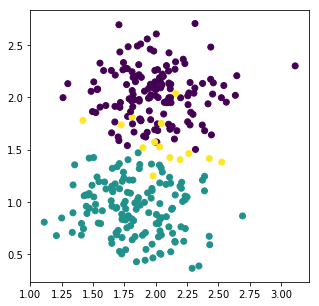

In [41]:
plt.figure(figsize=[5,5])
plt.scatter(x_test[:,0].numpy(), x_test[:,1].numpy(), c=preda)

In [42]:
bce_i = -np.round(np.log([output[i].item() if t == 1 else (1-output[i].item()) for i, t in enumerate(y_test)]), 3)
bce_i[:20]

array([1.000e-03, 1.000e-03, 1.260e-01, 0.000e+00, 0.000e+00, 4.700e-01,
       1.000e-03, 2.000e-03, 1.800e-02, 0.000e+00, 1.460e-01, 1.000e-03,
       0.000e+00, 1.000e-03, 0.000e+00, 2.760e-01, 1.158e+00, 1.900e-02,
       2.000e-03, 2.000e-03])

In [43]:
same

tensor([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  0,  0,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  0,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  0,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  0,  1,  1,  1,  1,  0,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1, 

In [44]:
loss

tensor(1.00000e-02 *
       9.5048)

In [45]:
x_test[9], output[9], y_test[9], pred[9]

(tensor([ 2.3445,  0.3881]), tensor(1.0000), tensor(1.), tensor(1.))

In [46]:
1-output[9].item()

3.5762786865234375e-07

In [47]:
-np.log(1-output[9].item())

14.843772864210633

In [48]:
n = 15
x_test[n], output[n], y_test[n], pred[n]

(tensor([ 2.0088,  1.5731]), tensor(0.2414), tensor(0.), tensor(0.))

In [49]:
output[n].item()

0.2413957566022873

In [50]:
-np.log(output[n].item())

1.4213175487570198

In [51]:
acc = torch.sum(same).double() / same.shape[0]
acc

tensor(0.9533, dtype=torch.float64)